# Reading CSV files in Python

CSV (Comma Separated Values) is a very popular import and export data format used in spreadsheets and databases. Each line in a CSV file is a data record. Each record consists of one or more fields, separated by commas. While CSV is a very simple data format, there can be many differences, such as different delimiters, new lines, or quoting characters.

While we could use the built-in open() function to work with CSV files in Python, there is a dedicated csv module that makes working with CSV files much easier.

We are going to exclusively use the csv module built into Python for this task. But first, we will have to import the module as :

In [1]:
import csv

# Reading CSV files Using csv.reader()
Let's read this file using csv.reader():

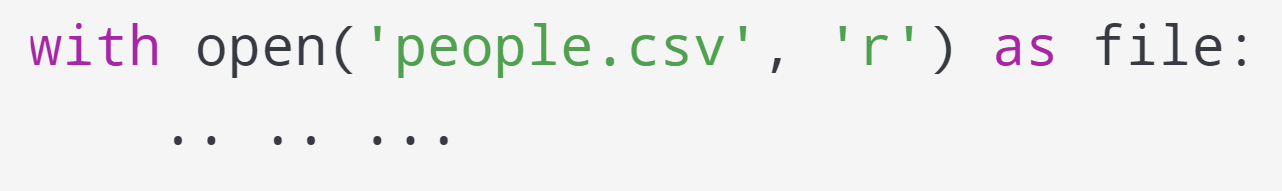

In [5]:
import csv
with open('people.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['Name', 'Age', 'Profession']
['Jack', '23', 'Doctor']
['Miller', '22', 'Engineer']


# CSV files with Custom Delimiters
By default, a comma is used as a delimiter in a CSV file. However, some CSV files can use delimiters other than a comma. Few popular ones are | and \t.

Suppose the innovators.csv file in Example 1 was using tab as a delimiter. To read the file, we can pass an additional delimiter parameter to the csv.reader() function.

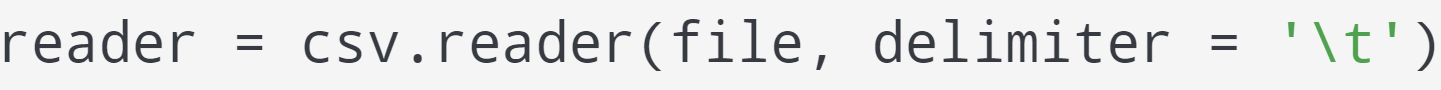

# CSV files with initial spaces

Some CSV files can have a space character after a delimiter. When we use the default csv.reader() function to read these CSV files, we will get spaces in the output as well.

To remove these initial spaces, we need to pass an additional parameter called skipinitialspace. Let us look at an example:

In [8]:
import csv
with open('new people.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, skipinitialspace=True)
    for row in reader:
        print(row)

['SN', 'Name', 'City']
['1', 'John', 'Washington']
['2', 'Eric', 'Los Angeles']
['3', 'Brad', 'Texas']


# CSV files with quotes
Some CSV files can have quotes around each or some of the entries.

Using csv.reader() in minimal mode will result in output with the quotation marks.

In order to remove them, we will have to use another optional parameter called quoting.

In [14]:
import csv
with open('people1.csv', 'r') as file:
    reader = csv.reader(file, quoting=csv.QUOTE_ALL, skipinitialspace=True)
    for row in reader:
        print(row)

['SN', 'Name', 'Quotes']
['1', 'Buddha', 'What we think we become']
['2', 'Mark Twain', 'Never regret anything that made you smile']
['3', 'Oscar Wilde', 'Be yourself everyone else is already taken']


<font color='green'>There are 3 other predefined constants you can pass to the quoting parameter, search in the 2nd link in the references</font> 

# Dialects in CSV module

Notice in above Example  that we have passed multiple parameters (quoting and skipinitialspace) to the csv.reader() function.

This practice is acceptable when dealing with one or two files. But it will make the code more redundant and ugly once we start working with multiple CSV files with similar formats.


As a solution to this, the csv module offers dialect as an optional parameter.

Dialect helps in grouping together many specific formatting patterns like delimiter, skipinitialspace, quoting, escapechar into a single dialect name.

It can then be passed as a parameter to multiple writer or reader instances.

<font color='red'>first, Let's see the csv file :</font>

The CSV file has initial spaces, quotes around each entry, and uses a | delimiter.

Instead of passing three individual formatting patterns, let's look at how to use dialects to read this file.



In [15]:
import csv
csv.register_dialect('myDialect',
                     delimiter='|',
                     skipinitialspace=True,
                     quoting=csv.QUOTE_ALL)

with open('office.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, dialect='myDialect')
    for row in reader:
        print(row)

['ID', 'Name', 'Email']
['A878', 'Alfonso K. Hamby', 'alfonsokhamby@rhyta.com']
['F854', 'Susanne Briard', 'susannebriard@armyspy.com']
['E833', 'Katja Mauer', 'kmauer@jadoop.com']


# the syntax of register_dialect :
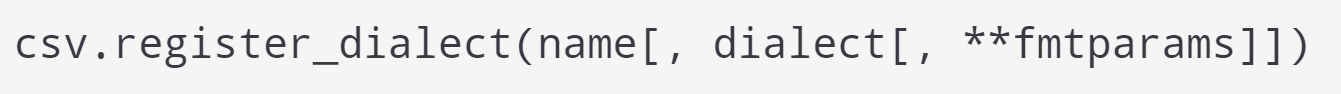

# Read CSV files with csv.DictReader()



The objects of a csv.DictReader() class can be used to read a CSV file as a dictionary.

Let's see how csv.DictReader() can be used.



In [17]:
import csv
with open("people.csv", 'r') as file:
    csv_file = csv.DictReader(file)
    for row in csv_file:
        print(dict(row))

OrderedDict([('Name', 'Jack'), ('Age', '23'), ('Profession', 'Doctor')])
OrderedDict([('Name', 'Miller'), ('Age', '22'), ('Profession', 'Engineer')])


<font color='red'>Starting from Python <font color='green'>3.8</font>, csv.DictReader() returns a dictionary for each row, and we do not need to use dict() explicitly.</font>

# one more important thing in python Docs:

# Using csv.Sniffer class

The Sniffer class is used to deduce the format of a CSV file.

The Sniffer class offers two methods:

1. sniff(sample, delimiters=None) - This function analyses a given sample of the CSV text and returns a Dialect subclass that contains all the parameters deduced.

An optional delimiters parameter can be passed as a string containing possible valid delimiter characters.

2. has_header(sample) - This function returns True or False based on analyzing whether the sample CSV has the first row as column headers.


# Let's look at how we can deduce the format of this file using csv.Sniffer() class:

In [29]:
import csv
with open('office.csv', 'r') as csvfile:
    sample = csvfile.read(64)
    has_header = csv.Sniffer().has_header(sample)
    print(has_header)

    deduced_dialect = csv.Sniffer().sniff(sample)

with open('office.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, deduced_dialect)

    for row in reader:
        print(row)

True
['ID', 'Name', 'Email']
['A878', 'Alfonso K. Hamby', 'alfonsokhamby@rhyta.com']
['F854', 'Susanne Briard', 'susannebriard@armyspy.com']
['E833', 'Katja Mauer', 'kmauer@jadoop.com']


# Writing CSV files in Python :

Basic Usage of csv.writer()
Let's look at a basic example of using csv.writer() to refresh your existing knowledge.

In [30]:
import csv
with open('innovators.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["SN", "Name", "Contribution"])
    writer.writerow([1, "Linus Torvalds", "Linux Kernel"])
    writer.writerow([2, "Tim Berners-Lee", "World Wide Web"])
    writer.writerow([3, "Guido van Rossum", "Python Programming"])

# Writing Multiple Rows with writerows()
If we need to write the contents of the 2-dimensional list to a CSV file, here's how we can do it.

In [31]:
import csv
row_list = [["SN", "Name", "Contribution"],
             [1, "Linus Torvalds", "Linux Kernel"],
             [2, "Tim Berners-Lee", "World Wide Web"],
             [3, "Guido van Rossum", "Python Programming"]]
with open('protagonist.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(row_list)

<font color='green'>There are lots of thing like reading csv files search in the 3rd link in the references</font>

# Write CSV files with csv.DictWriter()

The objects of csv.DictWriter() class can be used to write to a CSV file from a Python dictionary.

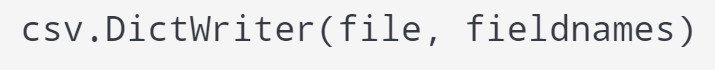

Here,

1. file - CSV file where we want to write to
2. fieldnames - a list object which should contain the column headers specifying the order in which data should be written in the CSV file

In [32]:
import csv

with open('players.csv', 'w', newline='') as file:
    fieldnames = ['player_name', 'fide_rating']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'player_name': 'Magnus Carlsen', 'fide_rating': 2870})
    writer.writerow({'player_name': 'Fabiano Caruana', 'fide_rating': 2822})
    writer.writerow({'player_name': 'Ding Liren', 'fide_rating': 2801})

# Useful code :

Let's cover the reading of CSV files into memory:



In [34]:
import csv

with open('example.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        print(row)
        print(row[0])
        print(row[0],row[1],row[2])

['1/2/2014', '5', '8', 'red']
1/2/2014
1/2/2014 5 8
['1/3/2014', '5', '2', 'green']
1/3/2014
1/3/2014 5 2
['1/4/2014', '9', '1', 'blue']
1/4/2014
1/4/2014 9 1


Above, we've shown how to open a CSV file and read each row, as well as reference specific data on each row.


Next, we will show how to pull out specific data from the spreadsheet and save it to a list variable:

In [35]:
import csv

with open('example.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    dates = []
    colors = []
    for row in readCSV:
        color = row[3]
        date = row[0]

        dates.append(date)
        colors.append(color)

    print(dates)
    print(colors)

['1/2/2014', '1/3/2014', '1/4/2014']
['red', 'green', 'blue']


Once we have this data, what can we do with it? Maybe we are curious about what color something was on a specific date.



In [37]:
import csv

with open('example.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    dates = []
    colors = []
    for row in readCSV:
        color = row[3]
        date = row[0]

        dates.append(date)
        colors.append(color)

    print(dates)
    print(colors)

    # now, remember our lists?

    whatColor = input('What color do you wish to know the date of?:')
    coldex = colors.index(whatColor)
    theDate = dates[coldex]
    print('The date of',whatColor,'is:',theDate)

['1/2/2014', '1/3/2014', '1/4/2014']
['red', 'green', 'blue']
What color do you wish to know the date of?:red
The date of red is: 1/2/2014


<font color='red'>Simple enough! If we enter something that doesn't exist, we get an ugly error.</font>

# Reference :

1. [https://www.programiz.com/python-programming/csv](https://www.programiz.com/python-programming/csv)
2. [https://www.programiz.com/python-programming/reading-csv-files](https://www.programiz.com/python-programming/reading-csv-files)
3. [https://www.programiz.com/python-programming/writing-csv-files](https://www.programiz.com/python-programming/writing-csv-files)
4. [https://pythonprogramming.net/reading-csv-files-python-3/](https://pythonprogramming.net/reading-csv-files-python-3/)